In [1]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Predict model performance

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = 'data/aggregated/experiments.csv'

Data

In [4]:
df = pd.read_csv(DATA_PATH)
df.head(5)

,topology,cells_number,possible_moves,connection_degree,depth,mean_log2_max_tile
0,hex,19,6,4.421053,2,11.275
1,hex,19,6,4.421053,1,11.105
2,hex,19,6,4.421053,4,13.065
3,hex,19,6,4.421053,3,13.130
4,hex,19,6,4.421053,0,9.120


Model training

In [5]:
features = ['cells_number', 'possible_moves', 'depth']
X = df[features].values
y = df['mean_log2_max_tile'].values

In [6]:
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

Evaluating

In [7]:
X_pred = sm.add_constant(X)
y_pred = model.predict(X_pred)

In [8]:
df['predicted_mean_log2_max_tile'] = y_pred
df_comparison = df[['depth', 'cells_number', 'possible_moves','mean_log2_max_tile', 'predicted_mean_log2_max_tile']]

Understanding the model

In [9]:
summary_df = pd.DataFrame({
    "feature": ["intercept", "cells_number", "possible_moves","depth"],
    "coef": model.params,
    "std_error": model.bse,
    "p_value": model.pvalues
}).sort_values(by="coef", ascending=False)
summary_df

,feature,coef,std_error,p_value
2,possible_moves,0.711144,0.123396,4.545786e-06
3,depth,0.623833,0.080621,3.284736e-08
1,cells_number,0.431019,0.024542,6.093687e-16
0,intercept,-2.337485,0.786737,6.312282e-03


Comparing predicted performance across different depths











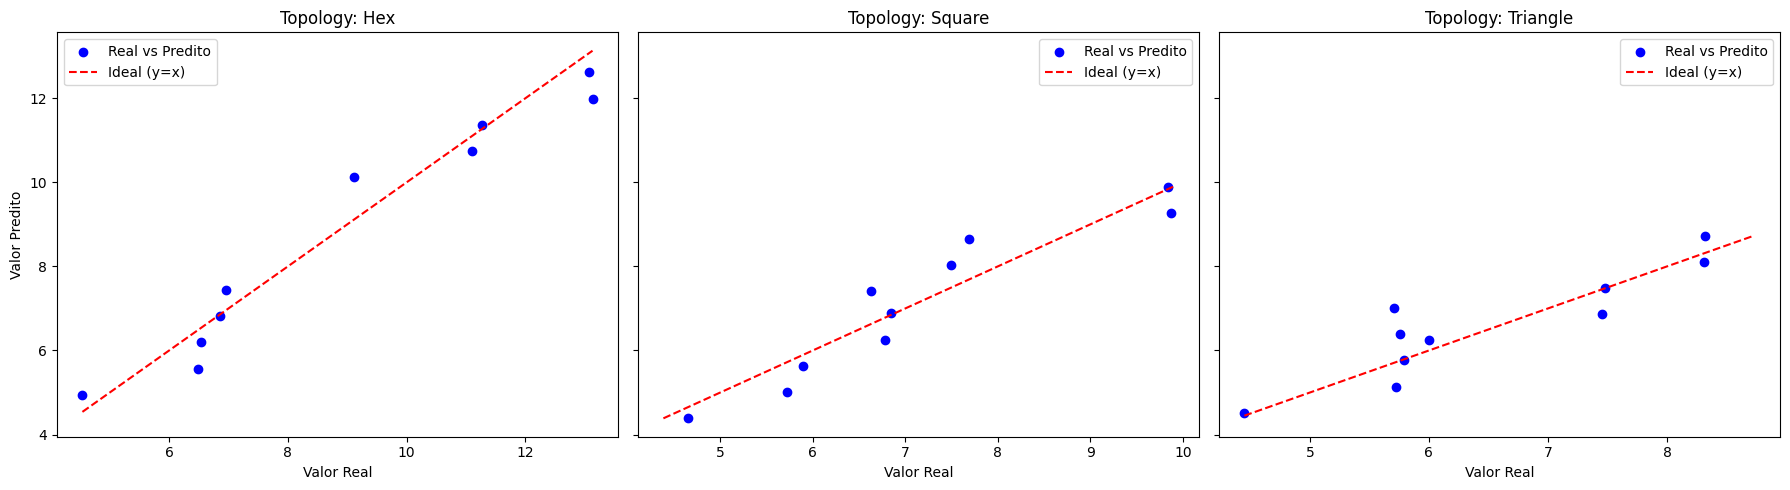

In [10]:
topologies = df["topology"].unique()
n_topos = len(topologies)

fig, axes = plt.subplots(nrows=1, ncols=n_topos, figsize=(6 * n_topos, 5), sharey=True)

if n_topos == 1:
    axes = [axes]

for ax, topo in zip(axes, topologies):
    topo_df = df[df["topology"] == topo]

    ax.scatter(
        topo_df["mean_log2_max_tile"],
        topo_df["predicted_mean_log2_max_tile"],
        color='blue',
        marker='o',
        label='Real vs Predito'
    )
    
    # Linha y = x (linha de referência ideal)
    min_val = min(topo_df["mean_log2_max_tile"].min(), topo_df["predicted_mean_log2_max_tile"].min())
    max_val = max(topo_df["mean_log2_max_tile"].max(), topo_df["predicted_mean_log2_max_tile"].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal (y=x)')

    ax.set_title(f"Topology: {topo.capitalize()}")
    ax.set_xlabel("Valor Real")
    ax.legend()

axes[0].set_ylabel("Valor Predito")

plt.tight_layout()
plt.show()